In [ ]:
import pandas as pd
import re

## Preprocessing

In [ ]:
df1 = pd.read_excel('deals_update.xlsx')
df2 = pd.read_excel('Activities.xlsx')

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

# Memilih activity terakhir di tiap deal (jika deal memiliki > 1 activity)
df2 = df2.sort_values('Date').groupby('Deals').tail(1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 56 to 3
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   No                              38 non-null     int64         
 1   Title                           38 non-null     object        
 2   Type Activity                   38 non-null     object        
 3   Date                            38 non-null     datetime64[ns]
 4   Reminder 
(Minutes before Due)  37 non-null     float64       
 5   Owner                           38 non-null     object        
 6   Note                            38 non-null     object        
 7   Deals                           38 non-null     object        
 8   Contacts                        38 non-null     object        
 9   Companies                       37 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 3.3+ KB


In [ ]:
# Menggabungkan data deals dengan activity nya dengan key deal
merged_df = pd.merge(df1, df2, left_on='Deal Name', right_on='Deals', how='left')
merged_df

,No_x,Deal Name,Stage,Label,Reason,Amount,Expected Closed Date,Tags,Owner_x,Companies_x,...,No_y,Title,Type Activity,Date,Reminder \n(Minutes before Due),Owner_y,Note,Deals,Contacts_y,Companies_y
0,1,Translation SM NETA X,DEAL,DEAL,"deal harga, dibayar","Rp316.638.500,00",2024-06-30,NO TAG,KRM,NETA AUTO,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ERP fase 1,DEAL,DEAL,"project sudah selesai , menunggu pembayaran","Rp10.750.000,00",2024-06-30,ERP,KRM,Masiva Guna (Apotek Roxy),...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Pak Ardianta By Ncc -ARDCA MADAM,PAID,DEAL,Deal cocok untuk MADAM,"Rp23.000.000,00",2024-06-30,NO TAG,DEL,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ERP fase 2,DEAL,DEAL,"Deal harga, dibayar","\t\nRp7.200.000,00",2024-06-30,ERP,KRM,Masiva Guna (Apotek Roxy),...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,5,\nAdvanced Training Mazda CX60,DEAL,DEAL,"Deal harga, dibayar","\t\nRp102.500.000,00",2024-06-30,NO TAG,KRM,Mazda EMI,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,Sales Training (Volvo Cars),INITIAL MEETING/CALL,COLD,Tidak cocok dengan Custom Development/tidak di...,-,2024-01-01,NO TAG,KRM,Volvo Cars,...,60.0,First Meeting menggali kebutuhan,TASK,2023-09-22 14:00:00,30.0,Krismanto,MoM Kris dengan Pak Toto_Volvo Cars Indonesia....,Sales Training (Volvo Cars),-,-
77,78,Pembuatan Logo - ERA JAYA,INITIAL MEETING/CALL,NaN,NaN,"Rp12.500.000,00",2024-06-30,NO TAG,DEL,ERA JAYA,...,4.0,update follow up,TASK,2024-06-29 14:00:00,30.0,Delton,"Sudah kirim quotation , sedang di review",Pembuatan Logo - ERA JAYA,-,-
78,79,Software Seni (Bu Nina) - Website E Commerce,NEGOTIATION,LOST,"Cancel Project, dikerjakan internal","Rp150.000.000,00",2024-06-30,NO TAG,DEL,NaN,...,10.0,update follow up,TASK,2024-06-21 09:00:00,30.0,Delton,"Sudah meeting dengan tim , kebutuhan website d...",Software Seni (Bu Nina) - Website E Commerce,Bu Nin,-
79,80,Bunda BC - Optimisasi Ads di Marketplace,INITIAL MEETING/CALL,NaN,NaN,NaN,2024-06-30,NO TAG,DEL,Bunda BC,...,25.0,update follow up,TASK,2024-06-07 17:00:00,30.0,Delton,Mau meeting di tanggal 08 Juni 2024 sama mas G...,Bunda BC - Optimisasi Ads di Marketplace,-,-


In [ ]:
# Select fitur untuk training model klasifikasi
merged_df = merged_df[['Deal Name', 'Reason', 'Label', 'Type Activity', 'Note']]

In [ ]:
merged_df

,Deal Name,Reason,Label,Type Activity,Note
0,Translation SM NETA X,"deal harga, dibayar",DEAL,NaN,NaN
1,ERP fase 1,"project sudah selesai , menunggu pembayaran",DEAL,NaN,NaN
2,Pak Ardianta By Ncc -ARDCA MADAM,Deal cocok untuk MADAM,DEAL,NaN,NaN
3,ERP fase 2,"Deal harga, dibayar",DEAL,NaN,NaN
4,\nAdvanced Training Mazda CX60,"Deal harga, dibayar",DEAL,NaN,NaN
...,...,...,...,...,...
76,Sales Training (Volvo Cars),Tidak cocok dengan Custom Development/tidak di...,COLD,TASK,MoM Kris dengan Pak Toto_Volvo Cars Indonesia....
77,Pembuatan Logo - ERA JAYA,NaN,NaN,TASK,"Sudah kirim quotation , sedang di review"
78,Software Seni (Bu Nina) - Website E Commerce,"Cancel Project, dikerjakan internal",LOST,TASK,"Sudah meeting dengan tim , kebutuhan website d..."
79,Bunda BC - Optimisasi Ads di Marketplace,NaN,NaN,TASK,Mau meeting di tanggal 08 Juni 2024 sama mas G...


In [ ]:
merged_df.fillna(0, inplace=True)

<ipython-input-7-f59210643da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.fillna(0, inplace=True)


In [ ]:
merged_df.loc[merged_df['Note'] == 0, 'Note'] = merged_df['Reason']

In [ ]:
merged_df

,Deal Name,Reason,Label,Type Activity,Note
0,Translation SM NETA X,"deal harga, dibayar",DEAL,0,"deal harga, dibayar"
1,ERP fase 1,"project sudah selesai , menunggu pembayaran",DEAL,0,"project sudah selesai , menunggu pembayaran"
2,Pak Ardianta By Ncc -ARDCA MADAM,Deal cocok untuk MADAM,DEAL,0,Deal cocok untuk MADAM
3,ERP fase 2,"Deal harga, dibayar",DEAL,0,"Deal harga, dibayar"
4,\nAdvanced Training Mazda CX60,"Deal harga, dibayar",DEAL,0,"Deal harga, dibayar"
...,...,...,...,...,...
76,Sales Training (Volvo Cars),Tidak cocok dengan Custom Development/tidak di...,COLD,TASK,MoM Kris dengan Pak Toto_Volvo Cars Indonesia....
77,Pembuatan Logo - ERA JAYA,0,0,TASK,"Sudah kirim quotation , sedang di review"
78,Software Seni (Bu Nina) - Website E Commerce,"Cancel Project, dikerjakan internal",LOST,TASK,"Sudah meeting dengan tim , kebutuhan website d..."
79,Bunda BC - Optimisasi Ads di Marketplace,0,0,TASK,Mau meeting di tanggal 08 Juni 2024 sama mas G...


In [ ]:
df = merged_df.drop(columns=['Reason'])

In [ ]:
df.to_excel('data_training.xlsx', index=False)

In [ ]:
df.loc[df['Label']==0]

,Deal Name,Label,Type Activity,Note
15,TOD Admin - Bunda BC,0,TASK,Quotation sedang di revisi
22,Technomed ARDCA,0,0,0
23,District 8 - SOD / TOD,0,0,0
27,Half Sugar Cotton ARDCA,0,0,0
30,Java Spring Boot ToD,0,0,0
45,Translation Warranty Booklet TH-ID (MG),0,0,0
59,United Tractor - Digital Marketing,0,0,Masih tahap pendeketan
64,Pak Santomi - Broker,0,TASK,Keep kontak dengan pak santomi untuk menanyaka...
71,0,0,0,"Cancel, Project dipending"
73,Sunat Surgero,0,TASK,Sudah ajak berapa kali meeting belum tepat wak...


In [ ]:
# Define bobot untuk Type Activity
activity_weights = {
    'TASK': 1,
    'CALL': 2,
    'DEADLINE': 1,
    'EMAIL': 1,
    'MEETING': 3
}

note_weight = 1

# Add bobot berdasarkan jenis aktivitas dan notes
def calculate_activity_score(row):
    score = activity_weights.get(row['Type Activity'], 0)
    return score

df['Activity Score'] = df.apply(calculate_activity_score, axis=1)

In [ ]:
df['Activity Score'] = df['Activity Score'].astype(int)
df[df['Activity Score'] > 1]

,Deal Name,Label,Type Activity,Note,Activity Score


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'\d+', ' ', text)
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['Note'] = df['Note'].apply(clean_text)

### Sequence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Note'])
sequences = tokenizer.texts_to_sequences(df['Note'])

# Padding sequences
max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [ ]:
# # TF-IDF vectorization
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(max_features=1000)
# tfidf_matrix = vectorizer.fit_transform(df['Note']).toarray()

####

## Modeling

### Split data

In [ ]:
import numpy as np
X = np.hstack((df[['Activity Score']].values, padded_sequences))
y = df['Label'].replace({'COLD': 0, 'WARM': 1, 'HOT': 2, 'DEAL': 3, 'LOST': 4}).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D

# Parameter untuk embedding
vocab_size = len(tokenizer.word_index) + 1  # Total jumlah kata dalam tokenizer
embedding_dim = 128
input_length = max_sequence_length

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Pelatihan model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.9219 - loss: 0.1670 - val_accuracy: 0.7059 - val_loss: 1.3452
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.9375 - loss: 0.2303 - val_accuracy: 0.7059 - val_loss: 1.3707
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.9219 - loss: 0.2176 - val_accuracy: 0.7059 - val_loss: 1.3815
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.9531 - loss: 0.1857 - val_accuracy: 0.7059 - val_loss: 1.3963
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.9531 - loss: 0.1465 - val_accuracy: 0.7059 - val_loss: 1.4037
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9219 - loss: 0.2119 - val_accuracy: 0.7059 - val_loss: 1.4086
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.9531 - loss: 0.1838 - val_accuracy: 0.7059 - val_loss: 1.4177
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.9062 - loss: 0.2367 - val_accuracy: 0.7059 - v

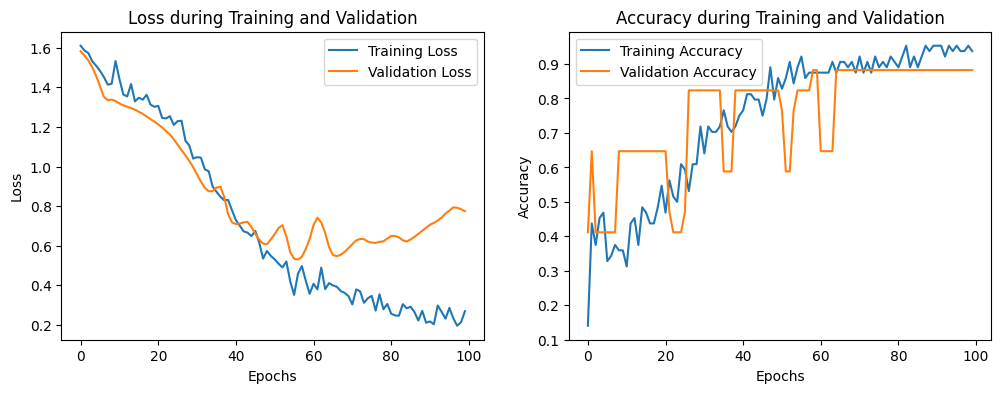

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Loss plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


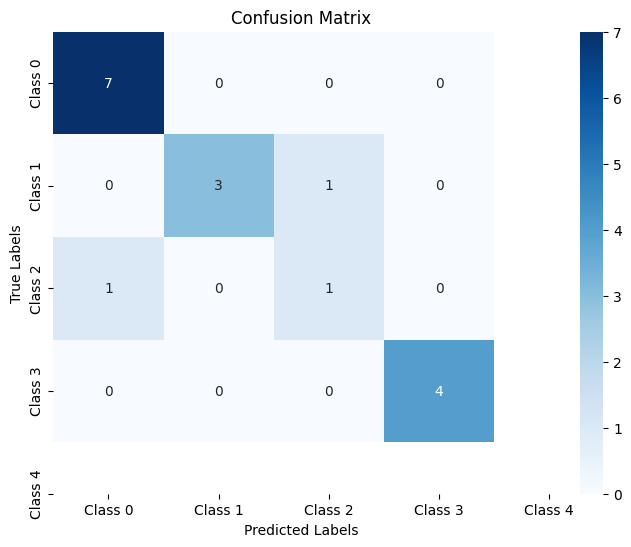

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('modelLSTM.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, GRU

# Parameter untuk embedding
vocab_size = len(tokenizer.word_index) + 1  # Total jumlah kata dalam tokenizer
embedding_dim = 128
input_length = max_sequence_length

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))
model.add(SpatialDropout1D(0.2))
model.add(GRU(128, return_sequences=False, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_3                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2656 - loss: 1.6045 - val_accuracy: 0.5882 - val_loss: 1.5847
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.3125 - loss: 1.5844 - val_accuracy: 0.5882 - val_loss: 1.5670
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.4219 - loss: 1.5560 - val_accuracy: 0.3529 - val_loss: 1.5469
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.3906 - loss: 1.5392 - val_accuracy: 0.3529 - val_loss: 1.5258
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.4844 - loss: 1.5068 - val_accuracy: 0.2941 - val_loss: 1.5017
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.3906 - loss: 1.4817 - val_accuracy: 0.2941 - val_loss: 1.4747
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.4844 - loss: 1.4381 - val_accuracy: 0.2941 - val_loss: 1.4456
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.3906 - loss: 1.4299 - val_accuracy: 0.2941 - val_

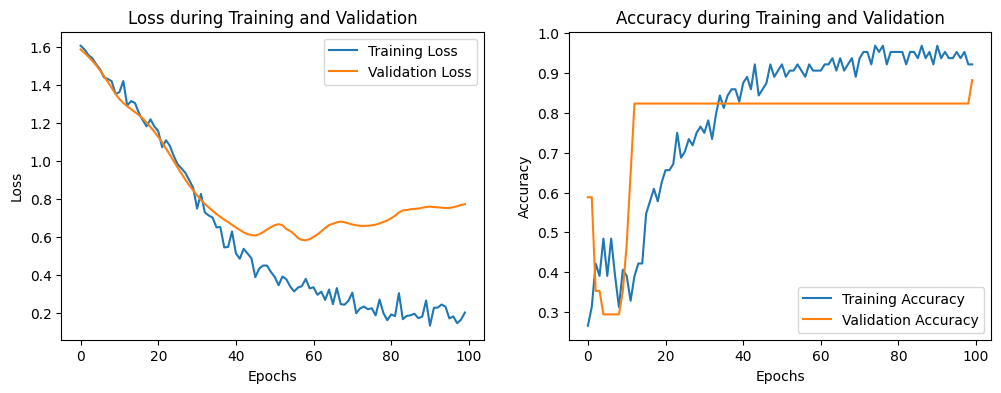

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Loss plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


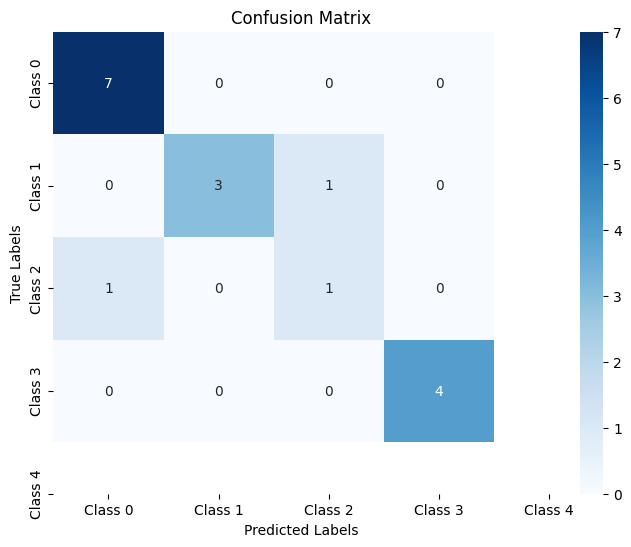

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('modelGRU.h5')

### Load Model

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('modelGRU.h5')

In [ ]:
predictions = loaded_model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8823529411764706
